# 7월 RF 분석

In [1]:
import pandas as pd
raw_hourly_df = pd.read_csv("sj_hourly_rainfall_case1.csv")
raw_hourly_df.head()

,date,4001430,4001440,4001450,4003420,4007450,4007470,4007472,4007474,4009460,...,4001450_gpm,4003420_gpm,4007450_gpm,4007470_gpm,4007472_gpm,4007474_gpm,4009460_gpm,9000140_gpm,9000233_gpm,9000234_gpm
0,2014-10-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2014-10-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2014-10-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2014-10-01 04:00:00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2014-10-01 05:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
raw_hourly_df['month'] = pd.DatetimeIndex(raw_hourly_df['date']).month_name()
raw_hourly_df.head()

,date,4001430,4001440,4001450,4003420,4007450,4007470,4007472,4007474,4009460,...,4003420_gpm,4007450_gpm,4007470_gpm,4007472_gpm,4007474_gpm,4009460_gpm,9000140_gpm,9000233_gpm,9000234_gpm,month
0,2014-10-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,October
1,2014-10-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,October
2,2014-10-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,October
3,2014-10-01 04:00:00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,October
4,2014-10-01 05:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,October


In [3]:
#raw_hourly_df = raw_hourly_df.loc[raw_hourly_df['month'] == "January"]
#raw_hourly_df = raw_hourly_df.loc[raw_hourly_df['month'] == "February"]
#raw_hourly_df = raw_hourly_df.loc[raw_hourly_df['month'] == "March"]
#raw_hourly_df = raw_hourly_df.loc[raw_hourly_df['month'] == "April"]
#raw_hourly_df = raw_hourly_df.loc[raw_hourly_df['month'] == "May"]
#raw_hourly_df = raw_hourly_df.loc[raw_hourly_df['month'] == "June"]
raw_hourly_df = raw_hourly_df.loc[raw_hourly_df['month'] == "July"]
#raw_hourly_df = raw_hourly_df.loc[raw_hourly_df['month'] == "August"]
#raw_hourly_df = raw_hourly_df.loc[raw_hourly_df['month'] == "September"]
#raw_hourly_df = raw_hourly_df.loc[raw_hourly_df['month'] == "October"]
#raw_hourly_df = raw_hourly_df.loc[raw_hourly_df['month'] == "November"]
#raw_hourly_df = raw_hourly_df.loc[raw_hourly_df['month'] == "December"]

## 1. 4001430 Station Random Forest 분석

In [4]:
st_code = "4001430"
x_col = st_code + "_gpm"
y_col = st_code

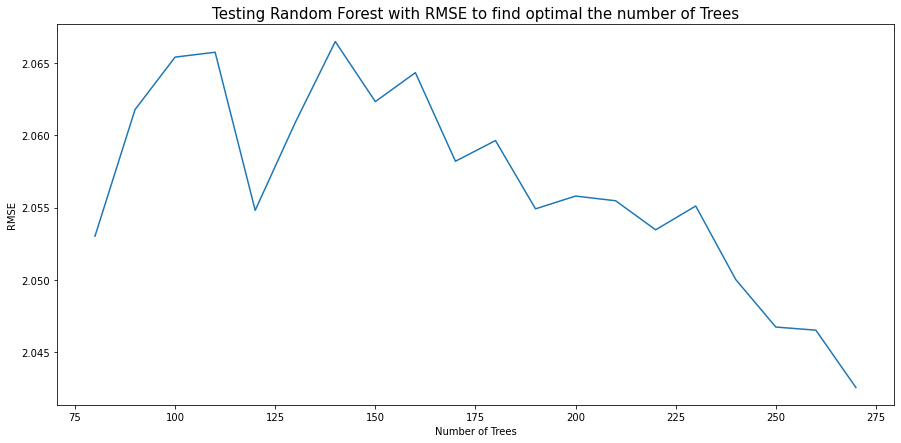

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

rmse_scores = []
estimators = []
X_val = raw_hourly_df[[x_col]]
y_val = raw_hourly_df[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)

rf = RandomForestRegressor(warm_start=True, random_state=2, n_jobs=-1)

est = 80

for i in range(20):
    rf.set_params(n_estimators=est)
    rf.fit(X, y)
    rmse = mean_squared_error(y_test, rf.predict(X_test), squared=False)
    
    rmse_scores.append(rmse)
    estimators.append(est)
    
    est += 10
    
plt.figure(figsize=(15, 7))
plt.plot(estimators, rmse_scores)

plt.xlabel("Number of Trees")
plt.ylabel("RMSE")

plt.title("Testing Random Forest with RMSE to find optimal the number of Trees", fontsize="15")
plt.show()

### Case-1 적용 RF

In [6]:
est_jan=180
cv_num = 20

rf = RandomForestRegressor(n_estimators=est_jan, random_state=2, n_jobs=-1)
X = raw_hourly_df[[x_col]]
y = raw_hourly_df[y_col]

In [7]:
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-1.58083701e+00, -6.10411871e-01, -4.51877989e+00, -1.07151058e+01,
       -1.95969806e-01, -2.60752948e+00, -2.89240636e+00, -1.76190647e+00,
       -4.75738965e+00, -3.23877875e-01, -1.56410719e-02, -3.03768606e-01,
       -1.92501993e+00, -6.86826577e+00, -1.50384133e-01, -6.11800781e+00,
       -2.19610893e+01, -1.37004383e+01, -4.90549977e+00, -2.32499103e-02])

In [8]:
rmse_case1 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case1, 3))
print('RMSE 평균: %0.3f' % (rmse_case1.mean()))

RMSE: [1.257 0.781 2.126 3.273 0.443 1.615 1.701 1.327 2.181 0.569 0.125 0.551
 1.387 2.621 0.388 2.473 4.686 3.701 2.215 0.152]
RMSE 평균: 1.679


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize 
from scipy.stats import gaussian_kde
from scipy.interpolate import interpn
from scipy import stats
from sklearn import linear_model

def density_scatter(x , y, st, bins=20, **kwargs )   :
    """
    Scatter plot colored by 2d histogram
    """
    fig = plt.figure(figsize=(11, 8))
    ax = fig.add_subplot(111)
    data, x_e, y_e = np.histogram2d(x, y, bins = bins, density = True )
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)

    #To be sure to plot all data
    z[np.where(np.isnan(z))] = 0.0

    idx = z.argsort()
    x, y, z = x[idx], y[idx], z[idx]

    ax.scatter(x, y, c=z, **kwargs )
    norm = Normalize(vmin = np.min(z), vmax = np.max(z))
    cbar = fig.colorbar(cm.ScalarMappable(norm = norm), ax=ax)
    cbar.ax.set_ylabel('Density', fontsize=18)
    cbar.ax.tick_params(labelsize=18) 
    ax.set_title('Ground Rainfall Prediction \n using IMERG in the Station: %i' %st , fontsize=18)
    ax.set_xlabel('Prediction (mm/h)', fontsize=18)
    ax.set_ylabel('Station Observation (mm/h)', fontsize=18)
    xt = [0, 2, 4, 6, 8, 10, 12, 14]
    ax.set_xlim([0, 15])
    ax.set_ylim([0, 15])
    ax.set_xticklabels(xt, fontsize=18)
    ax.set_yticklabels(xt, fontsize=18)

    x_pred = np.linspace(0, 20, 2)            
    x_pred = x_pred.reshape(-1, 1)  
    y_pred = model.predict(x_pred)

    ax.plot(x_pred, y_pred, color='k')
    ax.text(0.55, 0.2, '$y = %.2f x_1 - %.2f $' % (model.coef_[0], abs(model.intercept_)), fontsize=17, transform=ax.transAxes)

/tmp/ipykernel_12873/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_12873/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


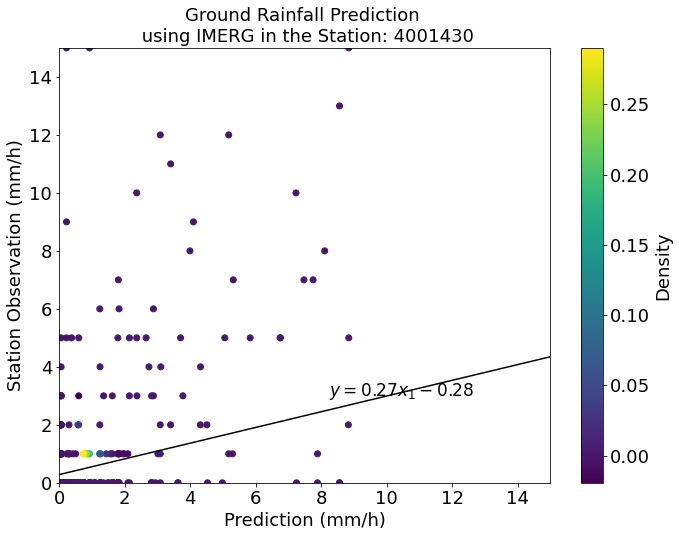

In [10]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

### Case-2 적용 RF

In [11]:
raw_hourly_df_new = raw_hourly_df[raw_hourly_df[y_col].loc[:]!=0].dropna()
zero_count = (len(raw_hourly_df) - len(raw_hourly_df_new))/len(raw_hourly_df)*100
X_val = raw_hourly_df_new[[x_col]]
y_val = raw_hourly_df_new[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)

scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([ -62.14728987, -117.91082827,  -40.55323468,  -25.43592008,
        -27.00541625,  -24.44805209,  -22.94836081,  -31.70559258,
        -56.53566918,  -13.42690139,  -50.93401148,  -25.28429425,
        -49.46086604,  -48.92911422,  -27.69737519,  -12.13111135,
       -170.33745657,  -15.46350834,  -30.59689941,  -16.77198486])

In [12]:
rmse_case2 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case2, 3))
print('RMSE 평균: %0.3f' % (rmse_case2.mean()))
print('제거된 0의 비율: %0.3f' % (zero_count))

RMSE: [ 7.883 10.859  6.368  5.043  5.197  4.944  4.79   5.631  7.519  3.664
  7.137  5.028  7.033  6.995  5.263  3.483 13.051  3.932  5.531  4.095]
RMSE 평균: 6.172
제거된 0의 비율: 91.071


/tmp/ipykernel_12873/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_12873/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


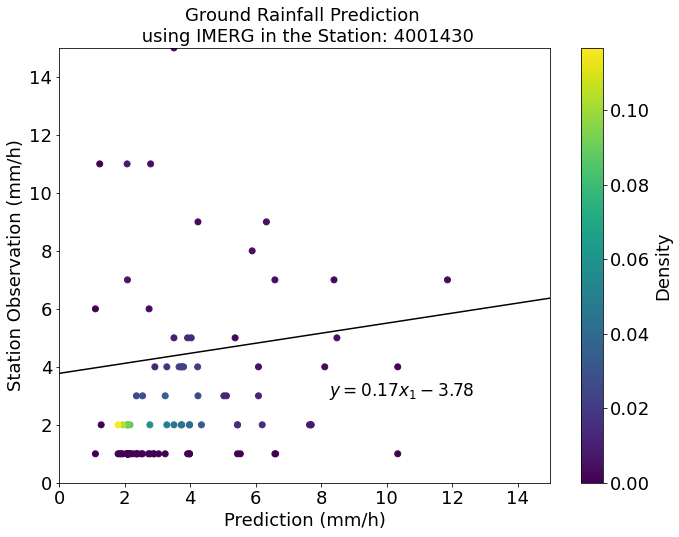

In [13]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

In [14]:
rmse_case1_all = []
rmse_case2_all = []
zero_count_ratio = []
rmse_case1_all.append(rmse_case1.mean())
rmse_case2_all.append(rmse_case2.mean())
zero_count_ratio.append(zero_count)

## 2. 4001440 Station Random Forest 분석

### Case-1 적용 RF

In [15]:
st_code = "4001440"
x_col = st_code + "_gpm"
y_col = st_code

In [16]:
rf = RandomForestRegressor(n_estimators=est_jan, random_state=2, n_jobs=-1)
X_val = raw_hourly_df[[x_col]]
y_val = raw_hourly_df[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)

scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([ -2.70352161,  -1.24190596, -19.92610137,  -7.04329993,
       -21.88787316,  -0.54346702,  -5.96256076,  -3.60779576,
       -14.04390836,  -4.11863081,  -0.80088061,  -2.22813949,
        -3.12708073,  -0.37085578,  -3.65732684,  -9.91729926,
        -2.25834332,  -0.84819047,  -2.64270643,  -6.35463569])

In [17]:
rmse_case1 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case1, 3))
print('RMSE 평균: %0.3f' % (rmse_case1.mean()))

RMSE: [1.644 1.114 4.464 2.654 4.678 0.737 2.442 1.899 3.748 2.029 0.895 1.493
 1.768 0.609 1.912 3.149 1.503 0.921 1.626 2.521]
RMSE 평균: 2.090


/tmp/ipykernel_12873/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_12873/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


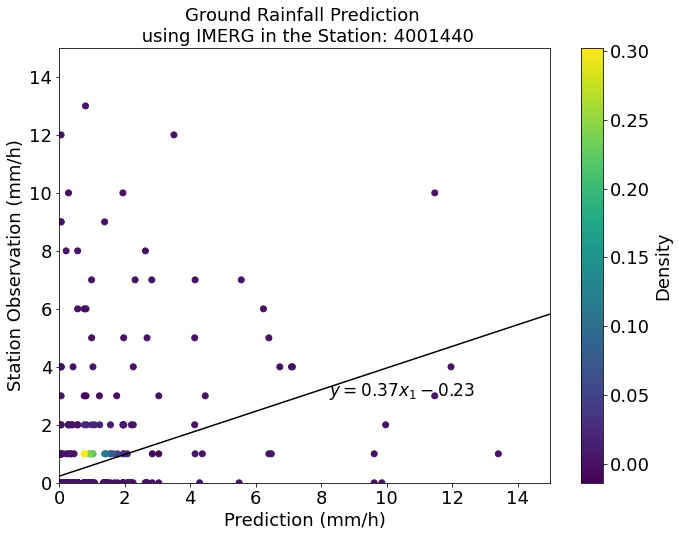

In [18]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

### Case-2 적용 RF

In [19]:
raw_hourly_df_new = raw_hourly_df[raw_hourly_df[y_col].loc[:]!=0].dropna()
zero_count = (len(raw_hourly_df) - len(raw_hourly_df_new))/len(raw_hourly_df)*100
X_val = raw_hourly_df_new[[x_col]]
y_val = raw_hourly_df_new[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)

scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([  -3.77159287,  -73.4874508 ,  -12.37683208,  -18.31333461,
        -36.50683029,  -17.79987844, -205.09724353,  -13.39909065,
        -18.66569083,   -6.98637694,  -14.80063198, -270.85067249,
        -46.90450108,  -11.731839  ,  -29.46798673,  -19.21401758,
        -65.13269524,   -3.87266974,  -44.16664421,  -23.1471352 ])

In [20]:
rmse_case2 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case2, 3))
print('RMSE 평균: %0.3f' % (rmse_case2.mean()))
print('제거된 0의 비율: %0.3f' % (zero_count))

RMSE: [ 1.942  8.572  3.518  4.279  6.042  4.219 14.321  3.66   4.32   2.643
  3.847 16.458  6.849  3.425  5.428  4.383  8.07   1.968  6.646  4.811]
RMSE 평균: 5.770
제거된 0의 비율: 90.591


/tmp/ipykernel_12873/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_12873/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


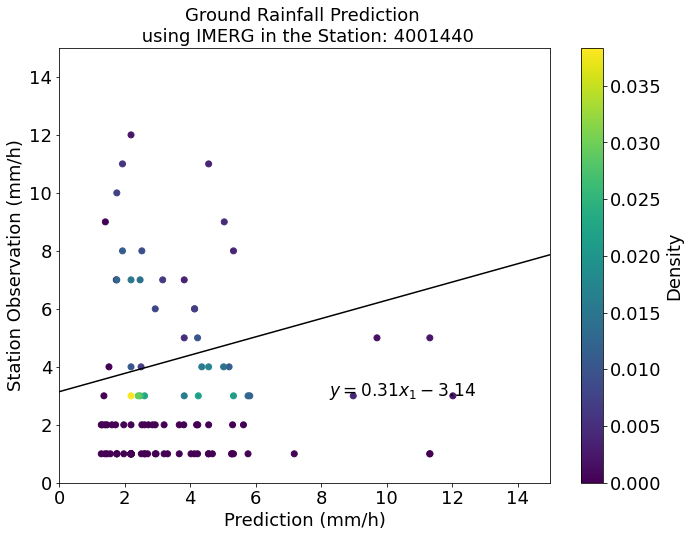

In [21]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

In [22]:
rmse_case1_all.append(rmse_case1.mean())
rmse_case2_all.append(rmse_case2.mean())
zero_count_ratio.append(zero_count)

## 3. 4001450 Station Random Forest 분석

### Case-1 적용 RF

In [23]:
st_code = "4001450"
x_col = st_code + "_gpm"
y_col = st_code

In [24]:
rf = RandomForestRegressor(n_estimators=est_jan, random_state=2, n_jobs=-1)
X_val = raw_hourly_df[[x_col]]
y_val = raw_hourly_df[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([ -3.36294446,  -1.74053603,  -6.38573295, -12.31554763,
       -12.78353871,  -2.57049027,  -1.70443607,  -5.4563991 ,
        -3.85184001,  -3.9468181 , -24.97333776,  -2.11099109,
        -1.76035395,  -2.97201993,  -2.41188803,  -9.95412956,
        -1.36531579, -11.66978966,  -3.34430676,  -3.82155615])

In [25]:
rmse_case1 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case1, 3))
print('RMSE 평균: %0.3f' % (rmse_case1.mean()))

RMSE: [1.834 1.319 2.527 3.509 3.575 1.603 1.306 2.336 1.963 1.987 4.997 1.453
 1.327 1.724 1.553 3.155 1.168 3.416 1.829 1.955]
RMSE 평균: 2.227


/tmp/ipykernel_12873/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_12873/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


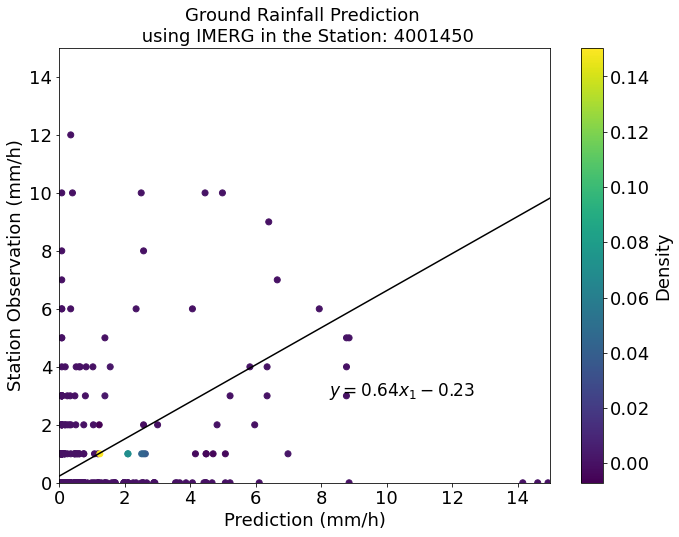

In [26]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

### Case-2 적용 RF

In [27]:
raw_hourly_df_new = raw_hourly_df[raw_hourly_df[y_col].loc[:]!=0].dropna()
zero_count = (len(raw_hourly_df) - len(raw_hourly_df_new))/len(raw_hourly_df)*100
X_val = raw_hourly_df_new[[x_col]]
y_val = raw_hourly_df_new[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([ -32.60139496,  -26.31711398,  -30.2415872 ,  -13.90611226,
        -27.97599805,  -22.53046562,  -51.56650199, -104.58936752,
        -20.67378526,  -37.77177461,  -21.3816555 , -108.70582103,
       -272.44445914,  -17.4775181 ,  -45.12006347,  -13.60043511,
        -54.41060346,  -40.60749575,  -43.46822389,  -32.09502126])

In [28]:
rmse_case2 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case2, 3))
print('RMSE 평균: %0.3f' % (rmse_case2.mean()))
print('제거된 0의 비율: %0.3f' % (zero_count))

RMSE: [ 5.71   5.13   5.499  3.729  5.289  4.747  7.181 10.227  4.547  6.146
  4.624 10.426 16.506  4.181  6.717  3.688  7.376  6.372  6.593  5.665]
RMSE 평균: 6.518
제거된 0의 비율: 89.958


/tmp/ipykernel_12873/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_12873/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


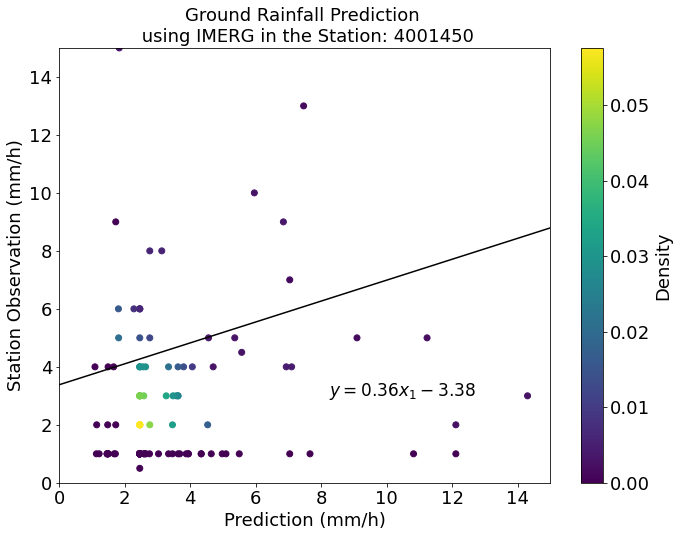

In [29]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

In [30]:
rmse_case1_all.append(rmse_case1.mean())
rmse_case2_all.append(rmse_case2.mean())
zero_count_ratio.append(zero_count)

## 4. 4003420 Station Random Forest 분석

### Case-1 적용 RF

In [31]:
st_code = "4003420"
x_col = st_code + "_gpm"
y_col = st_code

In [32]:
rf = RandomForestRegressor(n_estimators=est_jan, random_state=2, n_jobs=-1)
X_val = raw_hourly_df[[x_col]]
y_val = raw_hourly_df[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-1.3696167 , -1.31861424, -2.77869961, -4.16239429, -2.17547272,
       -0.82378948, -3.45483148, -4.65789308, -1.72806646, -2.2606009 ,
       -1.34197752, -5.14060311, -1.26592053, -1.41110679, -1.98130293,
       -3.73157584, -0.70401166, -1.3242753 , -2.8183471 , -2.80945446])

In [33]:
rmse_case1 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case1, 3))
print('RMSE 평균: %0.3f' % (rmse_case1.mean()))

RMSE: [1.17  1.148 1.667 2.04  1.475 0.908 1.859 2.158 1.315 1.504 1.158 2.267
 1.125 1.188 1.408 1.932 0.839 1.151 1.679 1.676]
RMSE 평균: 1.483


/tmp/ipykernel_12873/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_12873/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


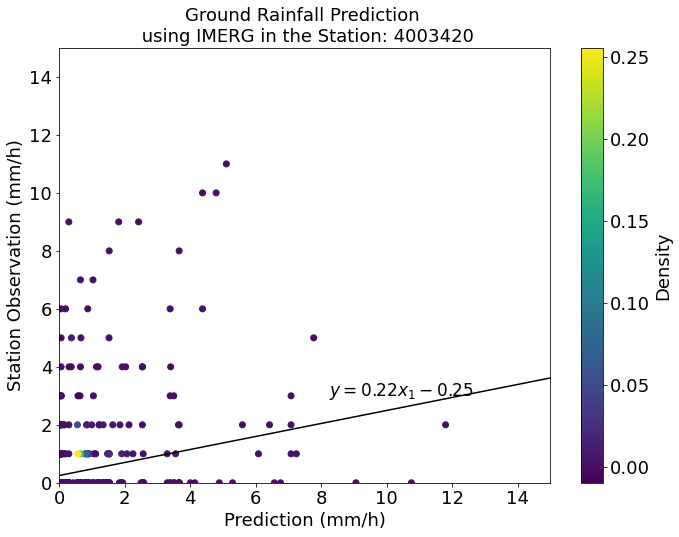

In [34]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

### Case-2 적용 RF

In [35]:
raw_hourly_df_new = raw_hourly_df[raw_hourly_df[y_col].loc[:]!=0].dropna()
zero_count = (len(raw_hourly_df) - len(raw_hourly_df_new))/len(raw_hourly_df)*100
X_val = raw_hourly_df_new[[x_col]]
y_val = raw_hourly_df_new[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-31.15736891, -71.7344891 ,  -3.73595497, -26.17287678,
       -16.62333557,  -7.77073664,  -6.66601392, -23.45857968,
        -7.72419957,  -9.55957897,  -9.86289342,  -7.97764116,
        -7.10461962,  -6.15481952, -18.13287477, -51.42074585,
       -13.15191496,  -8.79102667,  -8.41437386,  -6.4556517 ])

In [36]:
rmse_case2 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case2, 3))
print('RMSE 평균: %0.3f' % (rmse_case2.mean()))
print('제거된 0의 비율: %0.3f' % (zero_count))

RMSE: [5.582 8.47  1.933 5.116 4.077 2.788 2.582 4.843 2.779 3.092 3.141 2.824
 2.665 2.481 4.258 7.171 3.627 2.965 2.901 2.541]
RMSE 평균: 3.792
제거된 0의 비율: 90.649


/tmp/ipykernel_12873/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_12873/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


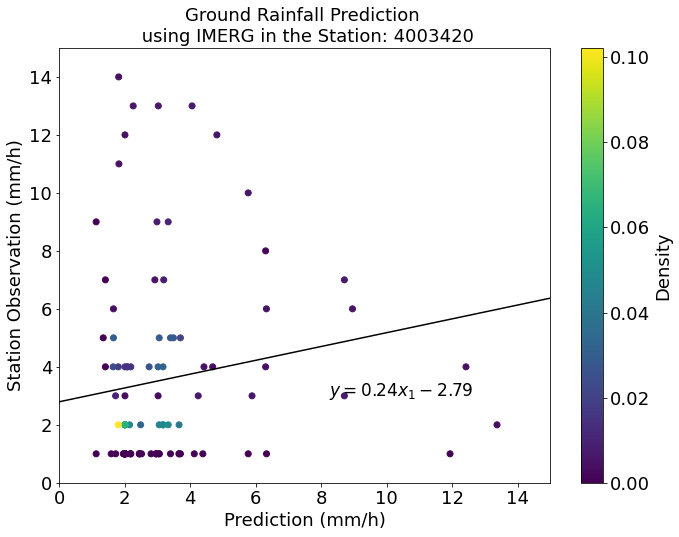

In [37]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

In [38]:
rmse_case1_all.append(rmse_case1.mean())
rmse_case2_all.append(rmse_case2.mean())
zero_count_ratio.append(zero_count)

## 5. 4007450 Station Random Forest 분석

### Case-1 적용 RF

In [39]:
st_code = "4007450"
x_col = st_code + "_gpm"
y_col = st_code

In [40]:
rf = RandomForestRegressor(n_estimators=est_jan, random_state=2, n_jobs=-1)
X_val = raw_hourly_df[[x_col]]
y_val = raw_hourly_df[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([ -8.77059394,  -3.01387962,  -1.82995198, -38.92762586,
        -6.45623046,  -9.89404168,  -6.45164399,  -8.37865324,
        -3.14334194,  -6.44972414,  -1.40603774,  -3.76765973,
        -1.51731884,  -3.54948065,  -2.82067185,  -3.58276988,
        -1.1199049 ,  -7.19830304,  -1.16058739,  -6.80262288])

In [41]:
rmse_case1 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case1, 3))
print('RMSE 평균: %0.3f' % (rmse_case1.mean()))

RMSE: [2.962 1.736 1.353 6.239 2.541 3.145 2.54  2.895 1.773 2.54  1.186 1.941
 1.232 1.884 1.679 1.893 1.058 2.683 1.077 2.608]
RMSE 평균: 2.248


/tmp/ipykernel_12873/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_12873/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


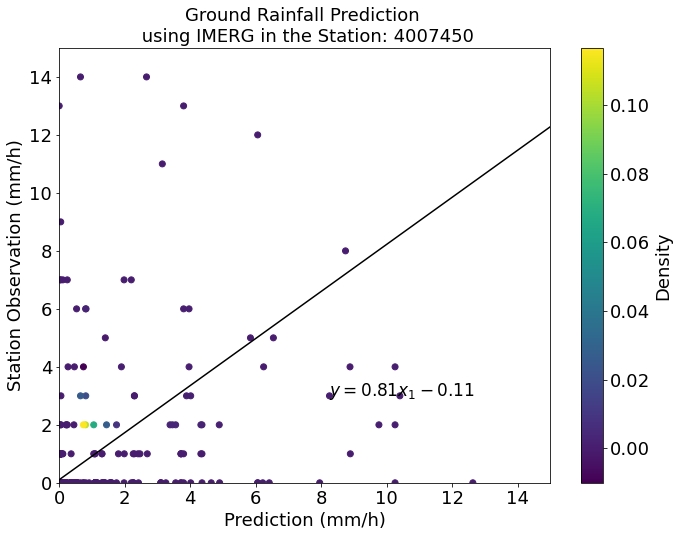

In [42]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

### Case-2 적용 RF

In [43]:
raw_hourly_df_new = raw_hourly_df[raw_hourly_df[y_col].loc[:]!=0].dropna()
zero_count = (len(raw_hourly_df) - len(raw_hourly_df_new))/len(raw_hourly_df)*100
X_val = raw_hourly_df_new[[x_col]]
y_val = raw_hourly_df_new[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([ -16.86478049, -455.85821734,  -32.44682672,  -74.76829251,
       -117.10866166,  -65.42487334, -119.0348238 ,  -54.89034513,
        -48.45620203,   -4.95548365,  -39.06595125,  -15.50848068,
       -182.23431785,  -80.49761629,   -5.26695352,  -18.73222085,
        -31.75259356,  -27.05334723,  -33.48362404,  -14.24044001])

In [44]:
rmse_case2 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case2, 3))
print('RMSE 평균: %0.3f' % (rmse_case2.mean()))
print('제거된 0의 비율: %0.3f' % (zero_count))

RMSE: [ 4.107 21.351  5.696  8.647 10.822  8.089 10.91   7.409  6.961  2.226
  6.25   3.938 13.499  8.972  2.295  4.328  5.635  5.201  5.787  3.774]
RMSE 평균: 7.295
제거된 0의 비율: 91.724


/tmp/ipykernel_12873/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_12873/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


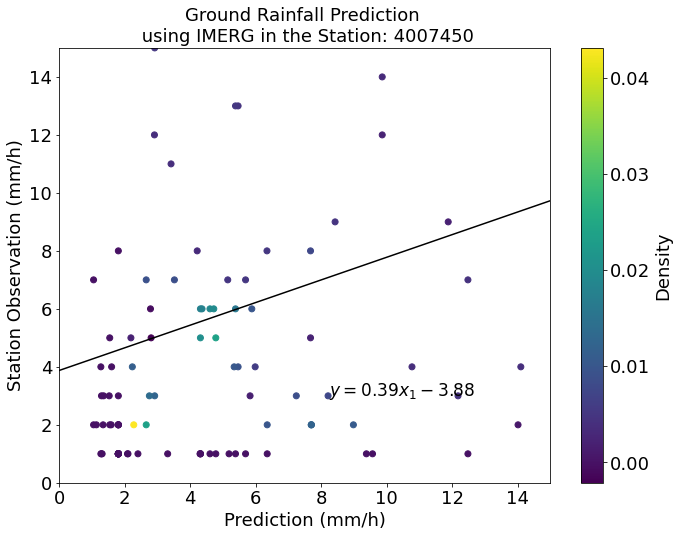

In [45]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

In [46]:
rmse_case1_all.append(rmse_case1.mean())
rmse_case2_all.append(rmse_case2.mean())
zero_count_ratio.append(zero_count)

## 6. 4007470 Station Random Forest 분석

### Case-1 적용 RF

In [47]:
st_code = "4007470"
x_col = st_code + "_gpm"
y_col = st_code

In [48]:
rf = RandomForestRegressor(n_estimators=est_jan, random_state=2, n_jobs=-1)
X_val = raw_hourly_df[[x_col]]
y_val = raw_hourly_df[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([ -3.61918426,  -1.72446068,  -0.97251247, -12.47012199,
       -12.98053154,  -8.44239518,  -7.48182706, -11.20323063,
        -4.62465848,  -1.39682003,  -1.4178421 ,  -3.91278611,
        -5.75169698, -10.07465052,  -7.39706577,  -5.50490794,
        -0.51653795,  -2.7643258 ,  -1.65565574,  -4.70073519])

In [49]:
rmse_case1 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case1, 3))
print('RMSE 평균: %0.3f' % (rmse_case1.mean()))

RMSE: [1.902 1.313 0.986 3.531 3.603 2.906 2.735 3.347 2.151 1.182 1.191 1.978
 2.398 3.174 2.72  2.346 0.719 1.663 1.287 2.168]
RMSE 평균: 2.165


/tmp/ipykernel_12873/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_12873/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


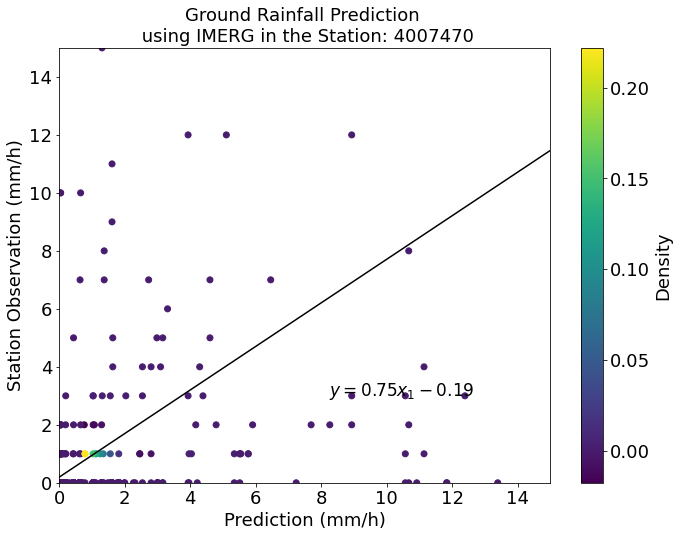

In [50]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

### Case-2 적용 RF

In [51]:
raw_hourly_df_new = raw_hourly_df[raw_hourly_df[y_col].loc[:]!=0].dropna()
zero_count = (len(raw_hourly_df) - len(raw_hourly_df_new))/len(raw_hourly_df)*100
X_val = raw_hourly_df_new[[x_col]]
y_val = raw_hourly_df_new[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([ -40.3621204 , -101.97492058,  -33.64529741,  -37.38109194,
        -32.32987778,  -21.17751568, -179.41147184,  -19.11911387,
        -22.97431331,   -7.43772209,  -55.10911793,   -9.25582738,
        -53.53669515, -175.35134483,  -13.02041242,  -20.05213161,
        -29.02152217,  -34.75893479,  -20.51053333,  -38.71653536])

In [52]:
rmse_case2 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case2, 3))
print('RMSE 평균: %0.3f' % (rmse_case2.mean()))
print('제거된 0의 비율: %0.3f' % (zero_count))

RMSE: [ 6.353 10.098  5.8    6.114  5.686  4.602 13.394  4.373  4.793  2.727
  7.424  3.042  7.317 13.242  3.608  4.478  5.387  5.896  4.529  6.222]
RMSE 평균: 6.254
제거된 0의 비율: 91.935


/tmp/ipykernel_12873/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_12873/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


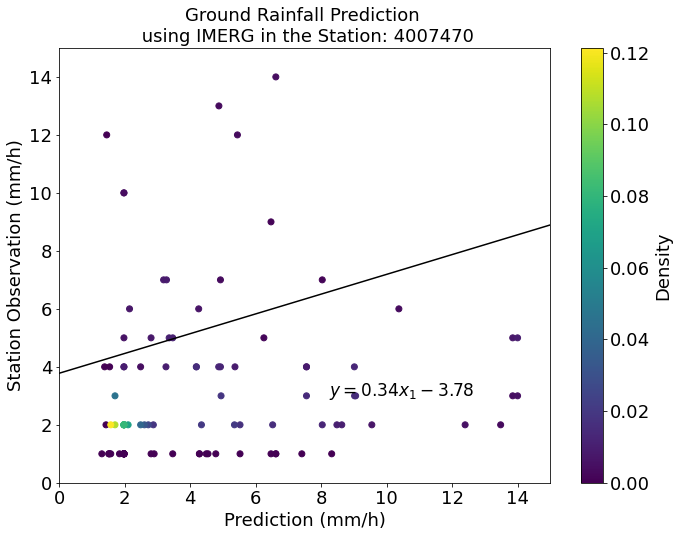

In [53]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

In [54]:
rmse_case1_all.append(rmse_case1.mean())
rmse_case2_all.append(rmse_case2.mean())
zero_count_ratio.append(zero_count)

## 7. 4007472 Station Random Forest 분석

### Case-1 적용 RF

In [55]:
st_code = "4007472"
x_col = st_code + "_gpm"
y_col = st_code

In [56]:
rf = RandomForestRegressor(n_estimators=est_jan, random_state=2, n_jobs=-1)
X_val = raw_hourly_df[[x_col]]
y_val = raw_hourly_df[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-0.76109061, -0.67184322, -0.33367187, -2.33286605, -2.37359927,
       -2.3774492 , -5.40498838, -5.56736188, -3.87616864, -2.11087593,
       -1.83998346, -3.91997903, -1.43706079, -5.73437996, -1.83726371,
       -3.36308213, -1.69960485, -4.95259507, -1.94940703, -2.51352703])

In [57]:
rmse_case1 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case1, 3))
print('RMSE 평균: %0.3f' % (rmse_case1.mean()))

RMSE: [0.872 0.82  0.578 1.527 1.541 1.542 2.325 2.36  1.969 1.453 1.356 1.98
 1.199 2.395 1.355 1.834 1.304 2.225 1.396 1.585]
RMSE 평균: 1.581


/tmp/ipykernel_12873/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_12873/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


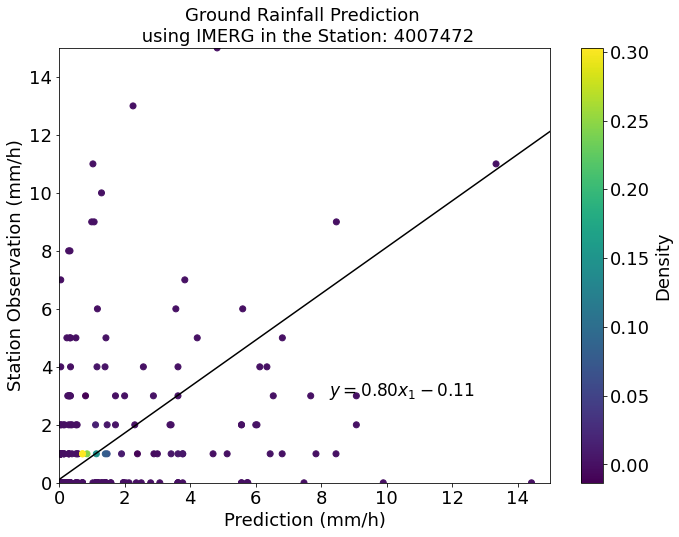

In [58]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

### Case-2 적용 RF

In [59]:
raw_hourly_df_new = raw_hourly_df[raw_hourly_df[y_col].loc[:]!=0].dropna()
zero_count = (len(raw_hourly_df) - len(raw_hourly_df_new))/len(raw_hourly_df)*100
X_val = raw_hourly_df_new[[x_col]]
y_val = raw_hourly_df_new[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-29.67891742, -30.54306301, -59.22539874, -39.84473949,
       -10.10465272, -28.02409137, -10.69957046, -34.88215788,
       -10.77224577, -41.12630983, -38.38706997, -23.80622739,
       -35.045895  ,  -9.49752831, -23.03851706, -10.36026807,
       -34.62951858, -19.20622884, -50.36779496, -48.11949148])

In [60]:
rmse_case2 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case2, 3))
print('RMSE 평균: %0.3f' % (rmse_case2.mean()))
print('제거된 0의 비율: %0.3f' % (zero_count))

RMSE: [5.448 5.527 7.696 6.312 3.179 5.294 3.271 5.906 3.282 6.413 6.196 4.879
 5.92  3.082 4.8   3.219 5.885 4.382 7.097 6.937]
RMSE 평균: 5.236
제거된 0의 비율: 91.436


/tmp/ipykernel_12873/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_12873/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


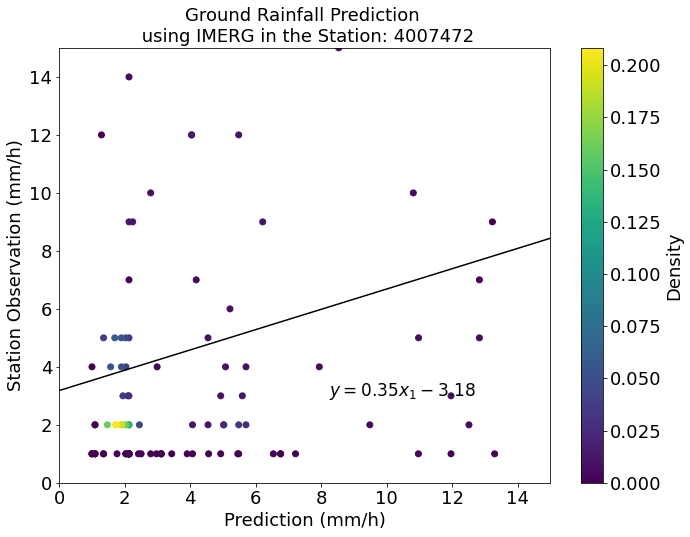

In [61]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

In [62]:
rmse_case1_all.append(rmse_case1.mean())
rmse_case2_all.append(rmse_case2.mean())
zero_count_ratio.append(zero_count)

## 8. 4007474 Station Random Forest 분석

### Case-1 적용 RF

In [63]:
st_code = "4007474"
x_col = st_code + "_gpm"
y_col = st_code

In [64]:
rf = RandomForestRegressor(n_estimators=est_jan, random_state=2, n_jobs=-1)
X_val = raw_hourly_df[[x_col]]
y_val = raw_hourly_df[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-24.8860646 ,  -8.2155426 ,  -1.09733266,  -9.23650884,
        -7.36939459,  -4.22437118,  -1.64927334,  -7.67011725,
        -7.82918486,  -2.43808717,  -1.53039585,  -7.36264647,
        -6.80383479,  -2.66907621, -17.59876629,  -6.88719534,
        -4.3183677 ,  -2.22342068,  -1.66797332,  -6.94139202])

In [65]:
rmse_case1 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case1, 3))
print('RMSE 평균: %0.3f' % (rmse_case1.mean()))

RMSE: [4.989 2.866 1.048 3.039 2.715 2.055 1.284 2.769 2.798 1.561 1.237 2.713
 2.608 1.634 4.195 2.624 2.078 1.491 1.292 2.635]
RMSE 평균: 2.382


/tmp/ipykernel_12873/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_12873/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


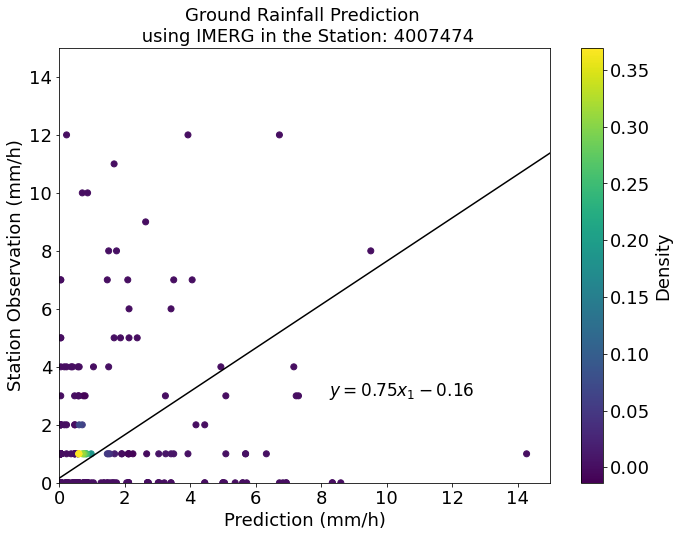

In [66]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

### Case-2 적용 RF

In [67]:
raw_hourly_df_new = raw_hourly_df[raw_hourly_df[y_col].loc[:]!=0].dropna()
zero_count = (len(raw_hourly_df) - len(raw_hourly_df_new))/len(raw_hourly_df)*100
X_val = raw_hourly_df_new[[x_col]]
y_val = raw_hourly_df_new[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([ -29.58445028,  -22.52200374, -252.69917485, -108.8690355 ,
        -39.09123377,   -9.20993326,  -83.87290033,  -43.20618184,
       -154.14170867,  -80.58071167,  -54.61791761,  -38.49650886,
        -25.87840363,  -32.48228851,  -46.50132431,  -98.91011917,
        -20.36342509,  -56.30727077,  -28.49939558,  -16.95865828])

In [68]:
rmse_case2 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case2, 3))
print('RMSE 평균: %0.3f' % (rmse_case2.mean()))
print('제거된 0의 비율: %0.3f' % (zero_count))

RMSE: [ 5.439  4.746 15.897 10.434  6.252  3.035  9.158  6.573 12.415  8.977
  7.39   6.205  5.087  5.699  6.819  9.945  4.513  7.504  5.338  4.118]
RMSE 평균: 7.277
제거된 0의 비율: 90.572


/tmp/ipykernel_12873/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_12873/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


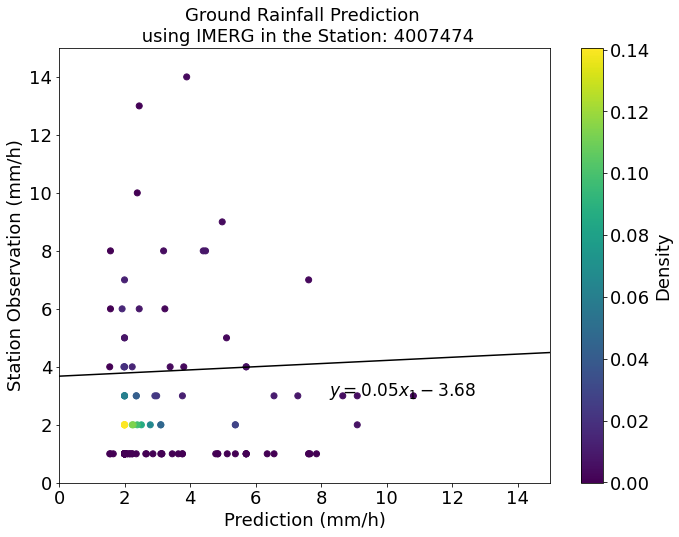

In [69]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

In [70]:
rmse_case1_all.append(rmse_case1.mean())
rmse_case2_all.append(rmse_case2.mean())
zero_count_ratio.append(zero_count)

## 9. 4009460 Station Random Forest 분석

### Case-1 적용 RF

In [71]:
st_code = "4009460"
x_col = st_code + "_gpm"
y_col = st_code

In [72]:
rf = RandomForestRegressor(n_estimators=est_jan, random_state=2, n_jobs=-1)
X_val = raw_hourly_df[[x_col]]
y_val = raw_hourly_df[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-1.13902507, -5.22134451, -1.46982413, -7.83675629, -7.16179314,
       -4.93066389, -2.80067303, -5.19345223, -2.81485361, -3.26903656,
       -2.27923669, -8.1200901 , -1.9555928 , -5.38554343, -3.12800386,
       -3.18704384, -2.80416427, -6.23596929, -4.37656115, -0.6850357 ])

In [73]:
rmse_case1 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case1, 3))
print('RMSE 평균: %0.3f' % (rmse_case1.mean()))

RMSE: [1.067 2.285 1.212 2.799 2.676 2.221 1.674 2.279 1.678 1.808 1.51  2.85
 1.398 2.321 1.769 1.785 1.675 2.497 2.092 0.828]
RMSE 평균: 1.921


/tmp/ipykernel_12873/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_12873/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


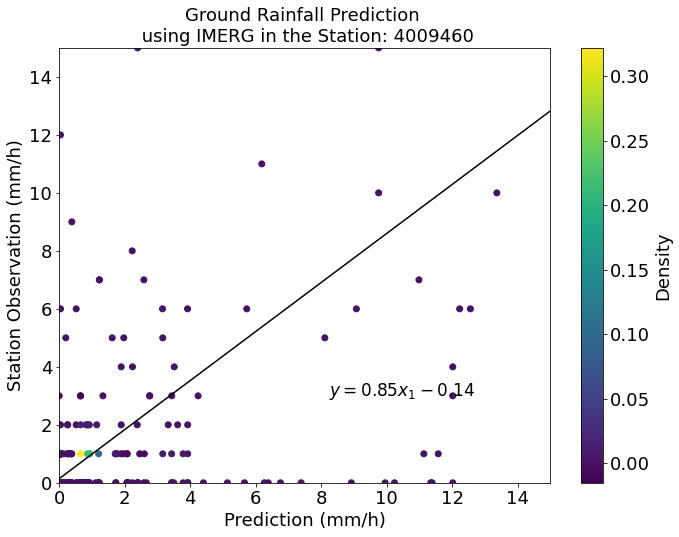

In [74]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

### Case-2 적용 RF

In [75]:
raw_hourly_df_new = raw_hourly_df[raw_hourly_df[y_col].loc[:]!=0].dropna()
zero_count = (len(raw_hourly_df) - len(raw_hourly_df_new))/len(raw_hourly_df)*100
X_val = raw_hourly_df_new[[x_col]]
y_val = raw_hourly_df_new[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([ -36.85150888,   -3.16554052,  -16.21843348,  -47.83478194,
        -33.10110568,  -46.58499768,  -14.405536  ,  -54.29942833,
        -27.00467558,  -44.29556323, -117.204881  ,  -35.30533998,
        -71.58262437,  -16.57131468,   -8.9001096 ,  -12.1486681 ,
        -18.08819862,   -8.69573381,   -4.38367096,  -15.58734951])

In [76]:
rmse_case2 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case2, 3))
print('RMSE 평균: %0.3f' % (rmse_case2.mean()))
print('제거된 0의 비율: %0.3f' % (zero_count))

RMSE: [ 6.071  1.779  4.027  6.916  5.753  6.825  3.795  7.369  5.197  6.655
 10.826  5.942  8.461  4.071  2.983  3.485  4.253  2.949  2.094  3.948]
RMSE 평균: 5.170
제거된 0의 비율: 92.166


/tmp/ipykernel_12873/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_12873/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


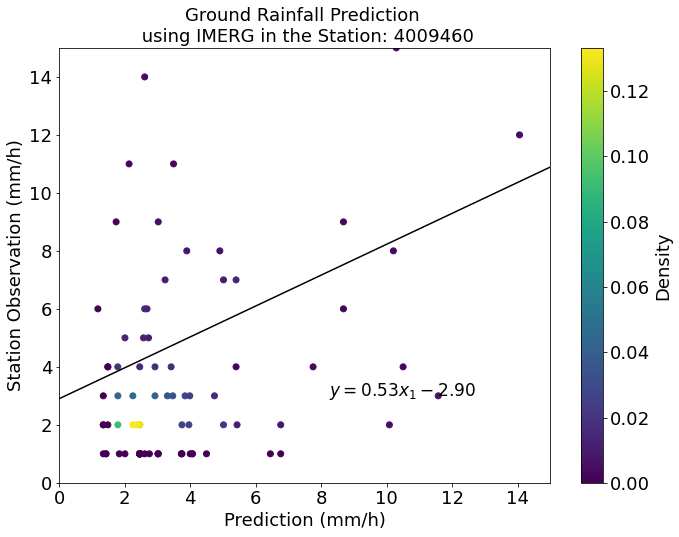

In [77]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

In [78]:
rmse_case1_all.append(rmse_case1.mean())
rmse_case2_all.append(rmse_case2.mean())
zero_count_ratio.append(zero_count)

## 10. 9000140 Station Random Forest 분석

### Case-1 적용 RF

In [79]:
st_code = "9000140"
x_col = st_code + "_gpm"
y_col = st_code

In [80]:
rf = RandomForestRegressor(n_estimators=est_jan, random_state=2, n_jobs=-1)
X_val = raw_hourly_df[[x_col]]
y_val = raw_hourly_df[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-6.46129792, -5.76199669, -0.67295476, -6.07138895, -1.56375376,
       -5.33904639, -4.82266133, -7.09677533, -1.33626876, -2.41052467,
       -1.09913811, -6.08662574, -2.85067358, -1.38802259, -4.14114757,
       -5.71093023, -3.14382053, -2.00778389, -1.89815821, -9.78245448])

In [81]:
rmse_case1 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case1, 3))
print('RMSE 평균: %0.3f' % (rmse_case1.mean()))

RMSE: [2.542 2.4   0.82  2.464 1.251 2.311 2.196 2.664 1.156 1.553 1.048 2.467
 1.688 1.178 2.035 2.39  1.773 1.417 1.378 3.128]
RMSE 평균: 1.893


/tmp/ipykernel_12873/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_12873/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


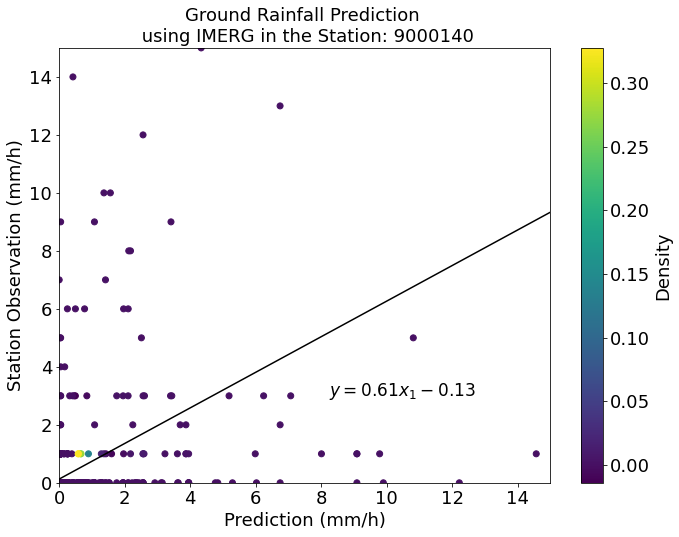

In [82]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

### Case-2 적용 RF

In [83]:
raw_hourly_df_new = raw_hourly_df[raw_hourly_df[y_col].loc[:]!=0].dropna()
zero_count = (len(raw_hourly_df) - len(raw_hourly_df_new))/len(raw_hourly_df)*100
X_val = raw_hourly_df_new[[x_col]]
y_val = raw_hourly_df_new[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-21.34093821, -10.3487192 , -42.92836363, -49.85952187,
       -27.61754395, -27.28972681, -24.15853043, -34.91599665,
       -86.97318107, -30.67228566,  -7.8449671 , -62.37211281,
       -60.19099573, -39.51292765, -52.33420231, -33.16235111,
        -5.88179032, -23.22283462, -16.2420079 , -84.8465536 ])

In [84]:
rmse_case2 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case2, 3))
print('RMSE 평균: %0.3f' % (rmse_case2.mean()))
print('제거된 0의 비율: %0.3f' % (zero_count))

RMSE: [4.62  3.217 6.552 7.061 5.255 5.224 4.915 5.909 9.326 5.538 2.801 7.898
 7.758 6.286 7.234 5.759 2.425 4.819 4.03  9.211]
RMSE 평균: 5.792
제거된 0의 비율: 91.417


/tmp/ipykernel_12873/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_12873/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


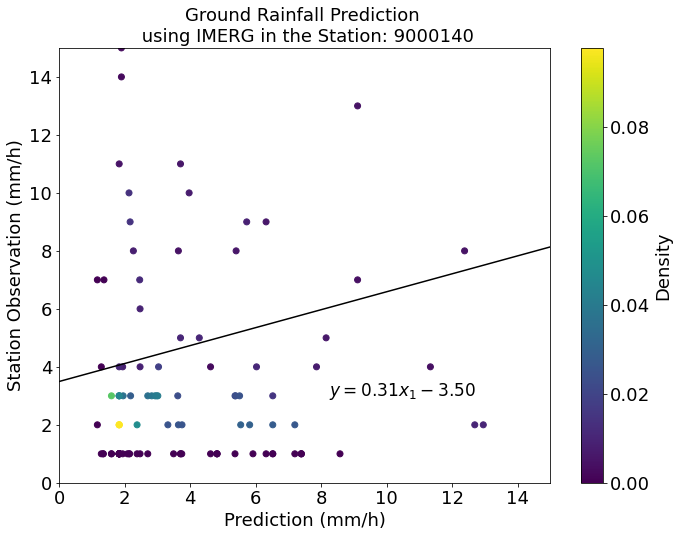

In [85]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

In [86]:
rmse_case1_all.append(rmse_case1.mean())
rmse_case2_all.append(rmse_case2.mean())
zero_count_ratio.append(zero_count)

## 11. 9000233 Station Random Forest 분석

### Case-1 적용 RF

In [87]:
st_code = "9000233"
x_col = st_code + "_gpm"
y_col = st_code

In [88]:
rf = RandomForestRegressor(n_estimators=est_jan, random_state=2, n_jobs=-1)
X_val = raw_hourly_df[[x_col]]
y_val = raw_hourly_df[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([ -3.91213734,  -2.67927418,  -1.12821513,  -1.60712903,
        -2.20148898,  -5.15971727, -20.39929691,  -7.4023023 ,
        -2.79826587,  -2.55199283,  -2.29152203,  -4.51403324,
        -6.14290895,  -9.0871948 ,  -4.15595648,  -2.0891868 ,
       -14.50524493,  -3.37238045,  -2.25498048,  -3.20218838])

In [89]:
rmse_case1 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case1, 3))
print('RMSE 평균: %0.3f' % (rmse_case1.mean()))

RMSE: [1.978 1.637 1.062 1.268 1.484 2.272 4.517 2.721 1.673 1.597 1.514 2.125
 2.478 3.014 2.039 1.445 3.809 1.836 1.502 1.789]
RMSE 평균: 2.088


/tmp/ipykernel_12873/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_12873/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


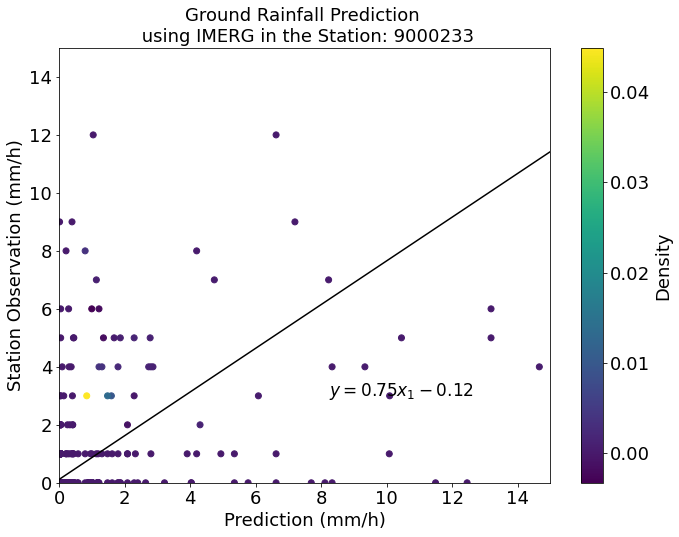

In [90]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

### Case-2 적용 RF

In [91]:
raw_hourly_df_new = raw_hourly_df[raw_hourly_df[y_col].loc[:]!=0].dropna()
zero_count = (len(raw_hourly_df) - len(raw_hourly_df_new))/len(raw_hourly_df)*100
X_val = raw_hourly_df_new[[x_col]]
y_val = raw_hourly_df_new[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([ -48.16326367, -205.58636223,  -59.15798847, -109.72750159,
         -8.30017241,  -70.32827684,  -26.9214647 , -157.45571601,
        -15.97219273,  -26.34453175, -100.24468644,  -70.25378819,
        -14.68409237,  -19.14359592,  -79.05658662,  -20.48044777,
        -12.52669281,  -15.2112106 ,  -98.20899791,  -58.63393304])

In [92]:
rmse_case2 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case2, 3))
print('RMSE 평균: %0.3f' % (rmse_case2.mean()))
print('제거된 0의 비율: %0.3f' % (zero_count))

RMSE: [ 6.94  14.338  7.691 10.475  2.881  8.386  5.189 12.548  3.997  5.133
 10.012  8.382  3.832  4.375  8.891  4.526  3.539  3.9    9.91   7.657]
RMSE 평균: 7.130
제거된 0의 비율: 91.475


/tmp/ipykernel_12873/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_12873/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


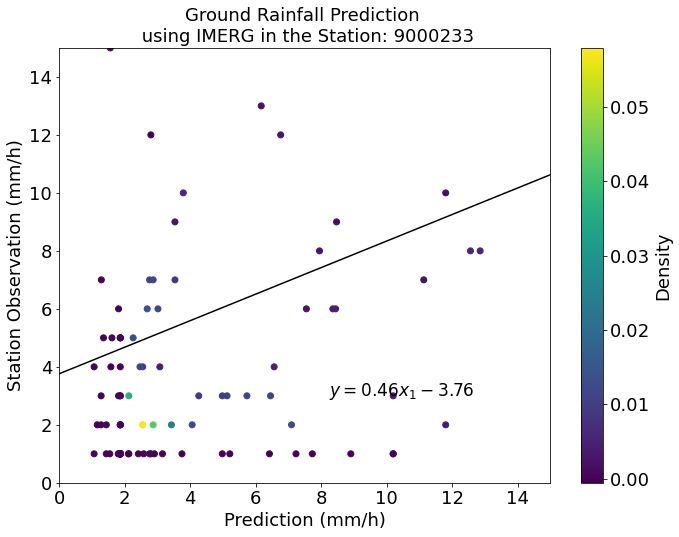

In [93]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

In [94]:
rmse_case1_all.append(rmse_case1.mean())
rmse_case2_all.append(rmse_case2.mean())
zero_count_ratio.append(zero_count)

## 12. 9000234 Station Random Forest 분석

### Case-1 적용 RF

In [95]:
st_code = "9000234"
x_col = st_code + "_gpm"
y_col = st_code

In [96]:
rf = RandomForestRegressor(n_estimators=est_jan, random_state=2, n_jobs=-1)
X_val = raw_hourly_df[[x_col]]
y_val = raw_hourly_df[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([ -6.20803969,  -2.80349116,  -1.61105149, -15.30806406,
       -22.03869057,  -3.83357799,  -6.65783296,  -3.191906  ,
        -1.84874242,  -1.67057949,  -1.71916188,  -3.03117074,
        -2.51734273,  -6.42928099,  -2.14089383,  -5.50360741,
        -2.28688575,  -7.44917939,  -2.13011993,  -5.05119896])

In [97]:
rmse_case1 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case1, 3))
print('RMSE 평균: %0.3f' % (rmse_case1.mean()))

RMSE: [2.492 1.674 1.269 3.913 4.695 1.958 2.58  1.787 1.36  1.293 1.311 1.741
 1.587 2.536 1.463 2.346 1.512 2.729 1.459 2.247]
RMSE 평균: 2.098


/tmp/ipykernel_12873/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_12873/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


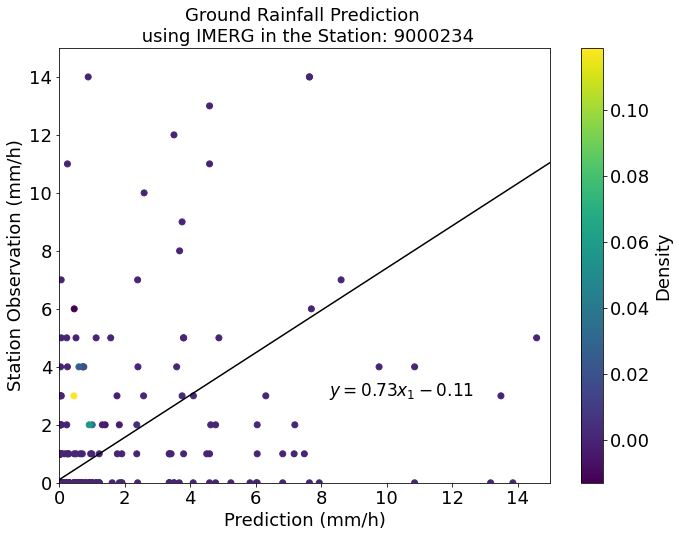

In [98]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

### Case-2 적용 RF

In [99]:
raw_hourly_df_new = raw_hourly_df[raw_hourly_df[y_col].loc[:]!=0].dropna()
zero_count = (len(raw_hourly_df) - len(raw_hourly_df_new))/len(raw_hourly_df)*100
X_val = raw_hourly_df_new[[x_col]]
y_val = raw_hourly_df_new[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([ -49.81156855,  -51.85491722,  -27.82623377,  -29.426645  ,
        -28.24699223,  -33.17315237,  -15.51855525,  -79.85754999,
        -33.31623744,  -35.95373556,  -18.79386236,  -41.29815412,
        -10.29569494,  -67.32813149,  -28.10416619,  -10.09181271,
        -31.65455778,  -20.15867345,  -54.32561709, -246.19906714])

In [100]:
rmse_case2 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case2, 3))
print('RMSE 평균: %0.3f' % (rmse_case2.mean()))
print('제거된 0의 비율: %0.3f' % (zero_count))

RMSE: [ 7.058  7.201  5.275  5.425  5.315  5.76   3.939  8.936  5.772  5.996
  4.335  6.426  3.209  8.205  5.301  3.177  5.626  4.49   7.371 15.691]
RMSE 평균: 6.225
제거된 0의 비율: 91.801


/tmp/ipykernel_12873/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_12873/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


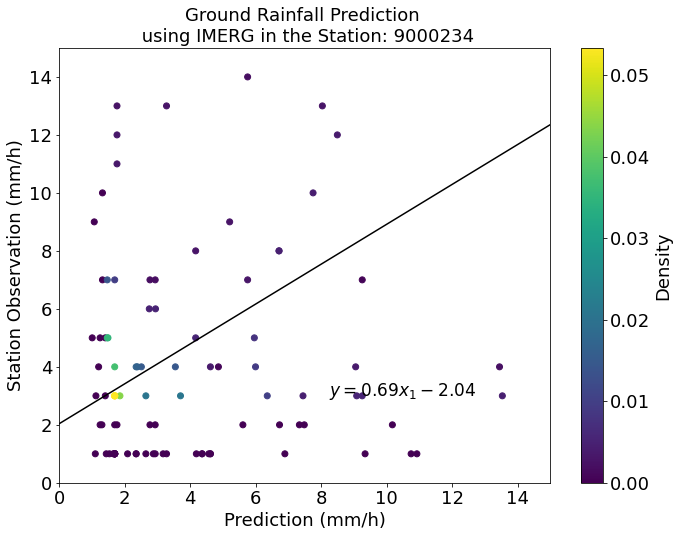

In [101]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

In [102]:
rmse_case1_all.append(rmse_case1.mean())
rmse_case2_all.append(rmse_case2.mean())
zero_count_ratio.append(zero_count)

In [103]:
rmse_case1_all

[1.6787090613641318,
 2.0903535480000057,
 2.226805190433559,
 1.483309451774009,
 2.2482363140841803,
 2.1649803291850866,
 1.5807783844336116,
 2.3816115649988454,
 1.9211323706732029,
 1.8929332326754396,
 2.087949491559491,
 2.0975722077930783]

In [104]:
rmse_case2_all

[6.172425422891556,
 5.770203726973499,
 6.517668819577926,
 3.7917480108767996,
 7.294817083751501,
 6.254307288364479,
 5.236176591184579,
 7.277240691729688,
 5.170006818908443,
 5.791919818792186,
 7.13014547196705,
 6.225390389037841]

In [105]:
zero_count_ratio

[91.07142857142857,
 90.59139784946237,
 89.95775729646698,
 90.64900153609831,
 91.7242703533026,
 91.93548387096774,
 91.43625192012288,
 90.57219662058372,
 92.16589861751152,
 91.41705069124424,
 91.47465437788019,
 91.8010752688172]

In [107]:
import pandas as pd
 
data = {'CASE_1_RMSE': pd.Series(rmse_case1_all,
                       index=raw_hourly_df.columns[1:13].values),
        'CASE_2_RMSE': pd.Series(rmse_case2_all,
                       index=raw_hourly_df.columns[1:13].values),
        'Zero_Ratio(%)': pd.Series(zero_count_ratio,
                       index=raw_hourly_df.columns[1:13].values)}

df = pd.DataFrame(data)
 
# Print the data
df.to_csv("rf_7월.csv")
df

,CASE_1_RMSE,CASE_2_RMSE,Zero_Ratio(%)
4001430,1.678709,6.172425,91.071429
4001440,2.090354,5.770204,90.591398
4001450,2.226805,6.517669,89.957757
4003420,1.483309,3.791748,90.649002
4007450,2.248236,7.294817,91.724270
4007470,2.164980,6.254307,91.935484
4007472,1.580778,5.236177,91.436252
4007474,2.381612,7.277241,90.572197
4009460,1.921132,5.170007,92.165899
9000140,1.892933,5.791920,91.417051
